In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# DATA LOADING AND EXPLOARATION

In [43]:
cnames = ['ID', 'entity', 'sentiment', 'comment']
data = pd.read_csv('C:/Users/KRITHIGA/Downloads/twitter_sentiment/twitter_training.csv', header=None, names=cnames)
data

,ID,entity,sentiment,comment
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [44]:
data.shape

(74682, 4)

In [45]:
data.sentiment.unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

# Count of unique entities

In [46]:
game_counts = data['entity'].value_counts()
print(game_counts)

entity
TomClancysRainbowSix                 2400
MaddenNFL                            2400
Microsoft                            2400
LeagueOfLegends                      2394
CallOfDuty                           2394
Verizon                              2382
CallOfDutyBlackopsColdWar            2376
ApexLegends                          2376
Facebook                             2370
WorldOfCraft                         2364
Dota2                                2364
NBA2K                                2352
TomClancysGhostRecon                 2346
Battlefield                          2346
FIFA                                 2340
Xbox(Xseries)                        2334
Overwatch                            2334
johnson&johnson                      2328
Amazon                               2316
PlayStation5(PS5)                    2310
HomeDepot                            2310
Cyberpunk2077                        2304
CS-GO                                2304
GrandTheftAuto(GTA)        

# checking for duplicate values

In [48]:

duplicates = data.duplicated()
duplicated_rows = data[duplicates]
duplicated_rows.count()

ID           2700
entity       2700
sentiment    2700
comment      2340
dtype: int64

In [49]:
data.drop_duplicates(inplace=True)
duplicates = data.duplicated()
duplicated_rows = data[duplicates]
duplicated_rows.count()

ID           0
entity       0
sentiment    0
comment      0
dtype: int64

In [50]:
data.isnull().sum()
data = data.dropna()
data.isnull().sum()
data.nunique()

ID           12447
entity          32
sentiment        4
comment      69491
dtype: int64

In [51]:
for i in range(5):
    print(f"{i+1}: {data['comment'][i]}   ->   {data['sentiment'][i]}")
     
data['sentiment'].value_counts()

1: im getting on borderlands and i will murder you all ,   ->   Positive
2: I am coming to the borders and I will kill you all,   ->   Positive
3: im getting on borderlands and i will kill you all,   ->   Positive
4: im coming on borderlands and i will murder you all,   ->   Positive
5: im getting on borderlands 2 and i will murder you me all,   ->   Positive


sentiment
Negative      21698
Positive      19713
Neutral       17708
Irrelevant    12537
Name: count, dtype: int64

# VISUALIZATION

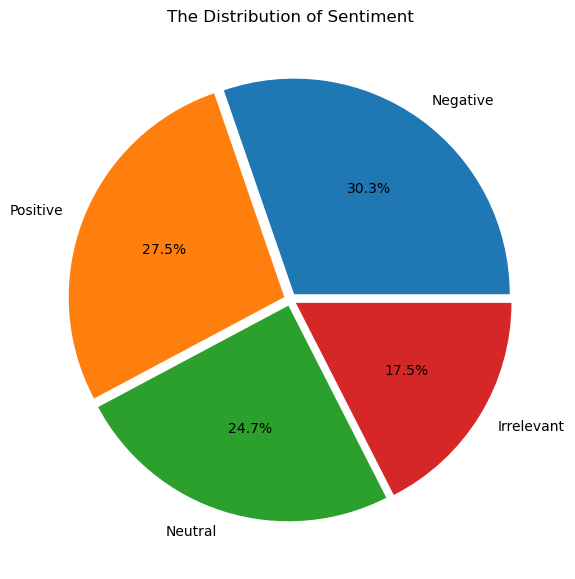

In [52]:
plt.figure(figsize=(10,7))
plt.pie(x=data['sentiment'].value_counts().values, labels=data['sentiment'].value_counts().index, autopct='%.1f%%', explode=[0.03, 0.03,0.03,0.03])
plt.title('The Distribution of Sentiment')
plt.show()

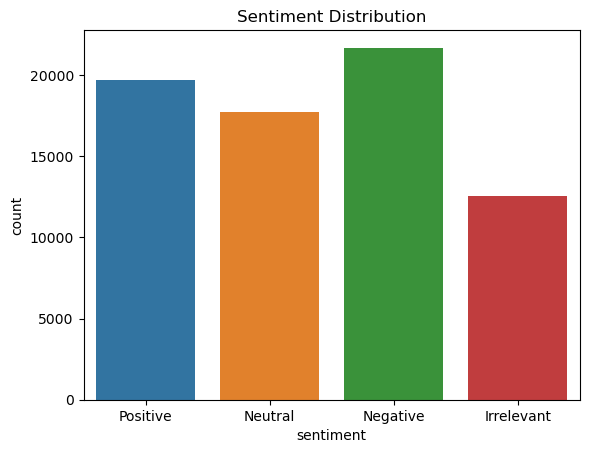

In [53]:
sns.countplot(x='sentiment', data=data)
plt.title('Sentiment Distribution')
plt.show()

# SENTIMENT ANALYSIS BY ENTITY

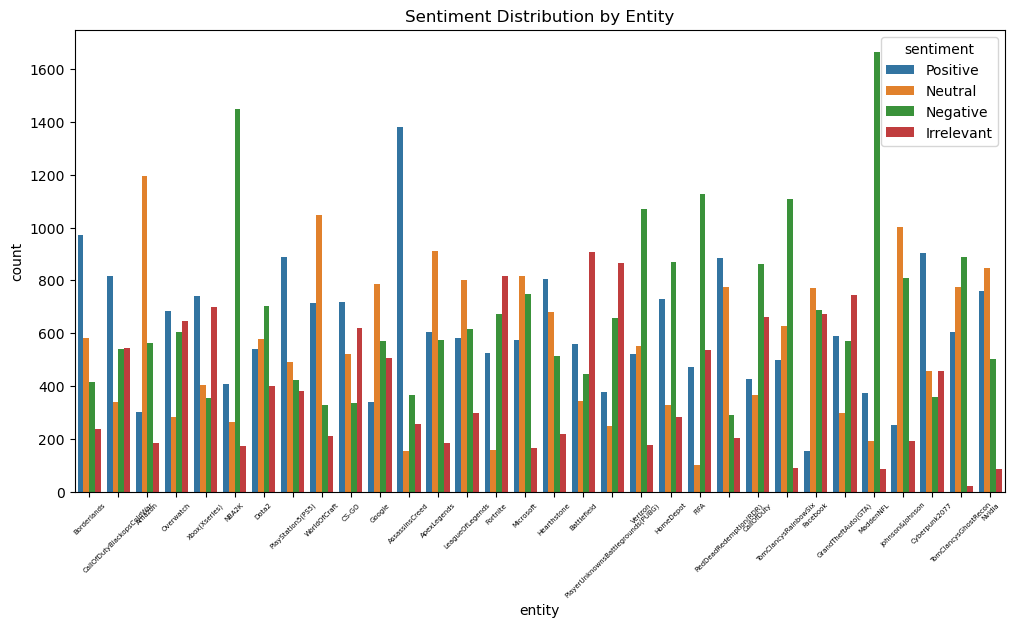

In [54]:

plt.figure(figsize=(12, 6))
sns.countplot(x='entity', hue='sentiment', data=data)
plt.title('Sentiment Distribution by Entity')
plt.xticks(rotation=45, fontsize=5)
plt.show()



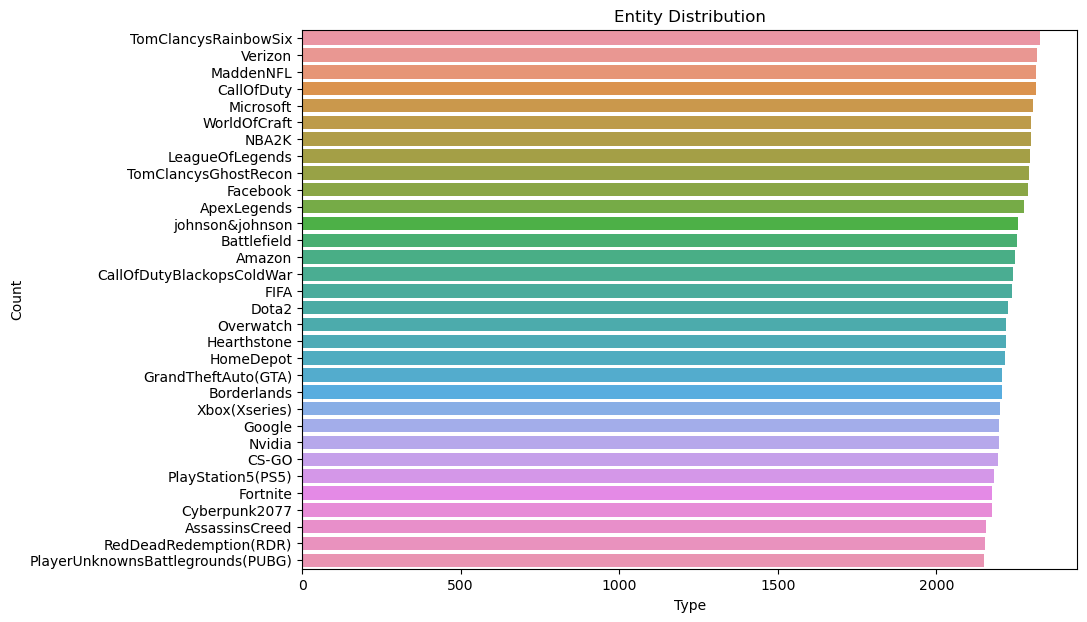

In [55]:
plt.figure(figsize=(10,7))
sns.barplot(x=data['entity'].value_counts().values,y=data['entity'].value_counts().index)
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Entity Distribution')
plt.show()

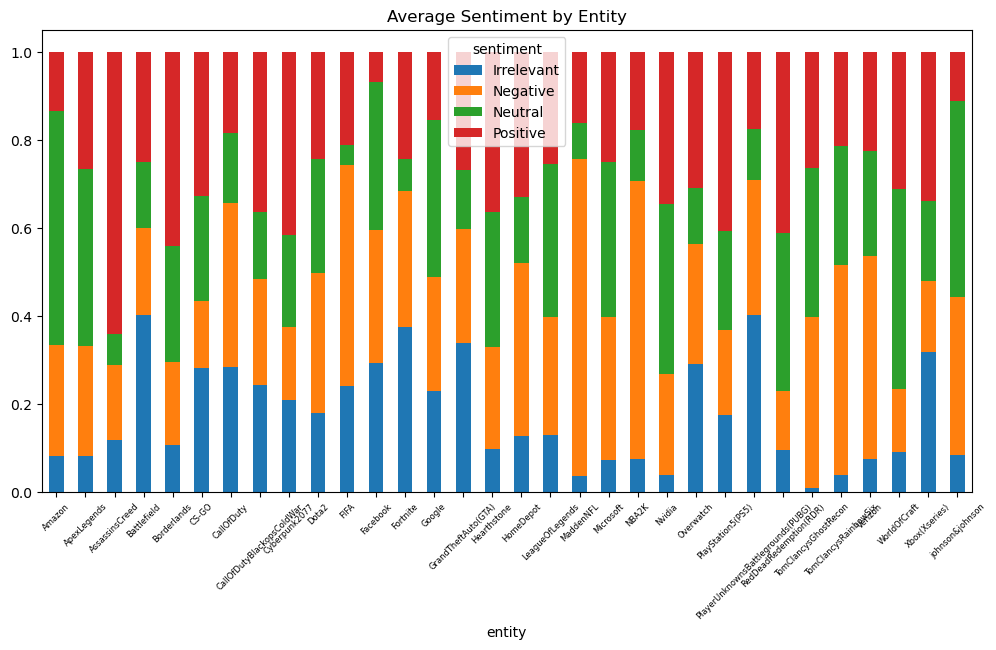

In [56]:

average_sentiment_by_entity = data.groupby('entity')['sentiment'].value_counts(normalize=True).unstack()
average_sentiment_by_entity.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Average Sentiment by Entity')
plt.xticks(rotation=45, fontsize=6)
plt.show()


# WORD CLOUD

In [57]:
import nltk
import re
stemmer = nltk.SnowballStemmer("english")
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))
     


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KRITHIGA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# TEXT CLEANING AND WORD CLOUD GENERATION


In [58]:

def clean(text):
    text = str(text).lower()
    text = re.sub('', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

In [59]:

twitter["comment"] = twitter["comment"].apply(clean)

In [60]:
!pip install wordcloud


In [61]:

from wordcloud import WordCloud, STOPWORDS
wc = WordCloud(width=800,height=500,min_font_size=10,background_color='white')

# Word clouds visualize the most frequent words used in comments with different sentiments, providing insights into common themes and opinions.

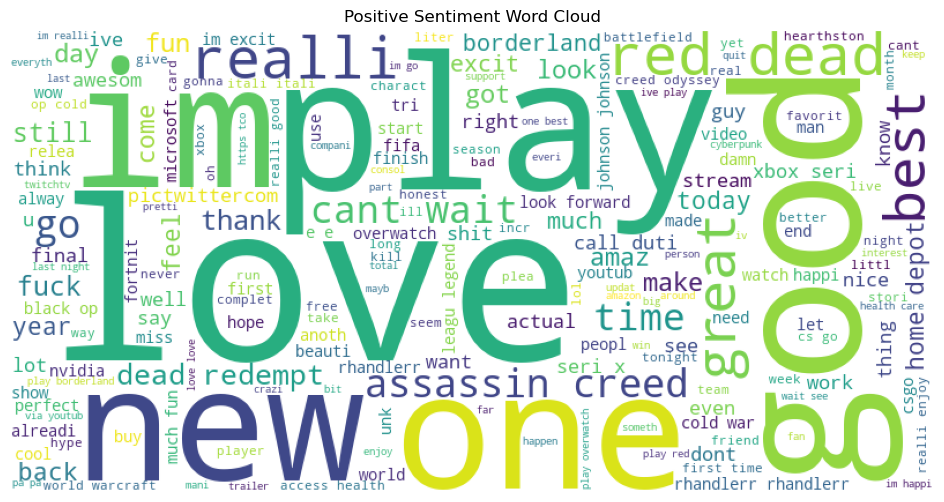

In [62]:
positive_data = twitter[twitter['sentiment'] == 'Positive']['comment'].str.cat(sep=" ")

# Exclude the word "game" from the text data
positive_data = positive_data.replace("game", "")
if positive_data:
    wc = WordCloud(width=800, height=400, background_color='white').generate(positive_data)
    plt.figure(figsize=(12, 6))
    plt.title('Positive Sentiment Word Cloud')
    plt.imshow(wc)
    plt.axis("off")
    plt.show()
else:
    print("No data available for positive sentiment.")

     


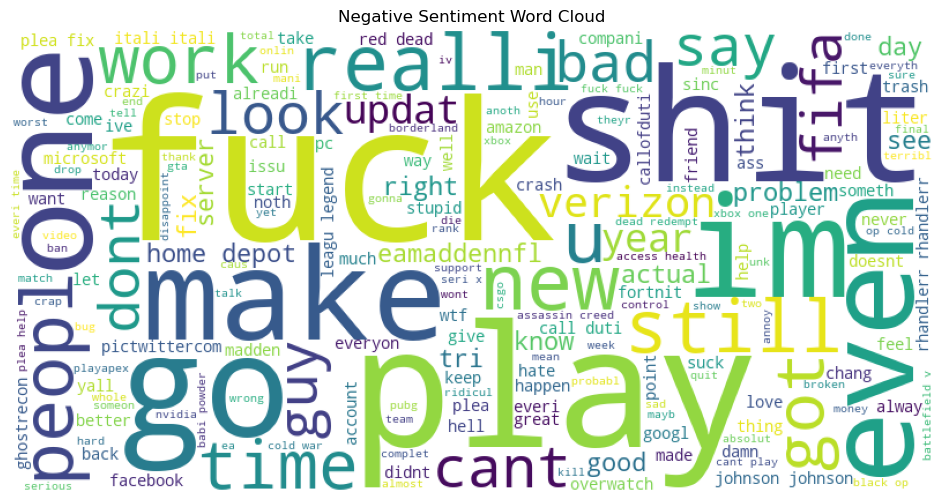

In [63]:

#Negative Sentiment Word Cloud:

negative_data = twitter[twitter['sentiment'] == 'Negative']['comment'].str.cat(sep=" ")

negative_data = negative_data.replace("game", "")

if negative_data.strip():
    wc = WordCloud(width=800, height=400, background_color='white').generate(negative_data)
    plt.figure(figsize=(12, 6))
    plt.title('Negative Sentiment Word Cloud')
    plt.imshow(wc)
    plt.axis("off")
    plt.show()
else:
    print("No data available for negative sentiment.")


     


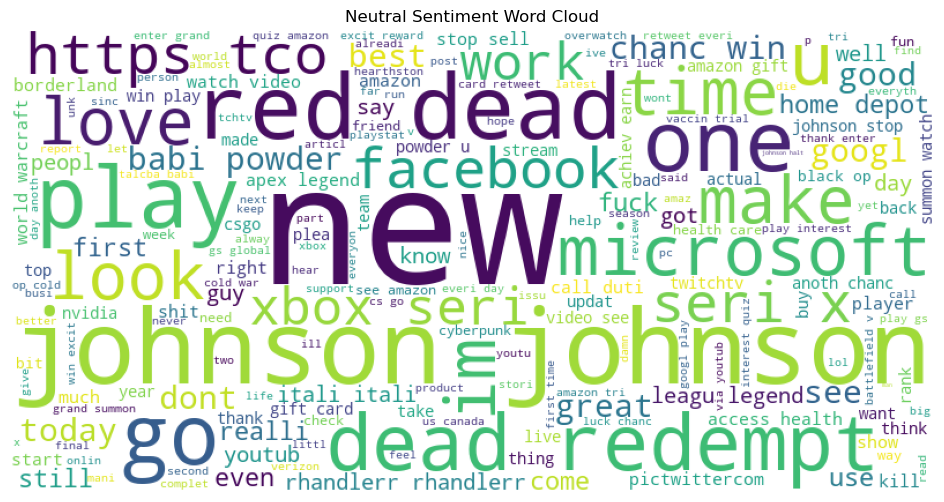

In [64]:

#Neutral Sentiment Word Cloud:

neutral_data = twitter[twitter['sentiment'] == 'Neutral']['comment'].str.cat(sep=" ")

neutral_data = neutral_data.replace("game", "")

if neutral_data.strip():
    wc = WordCloud(width=800, height=400, background_color='white').generate(neutral_data)
    plt.figure(figsize=(12, 6))
    plt.title('Neutral Sentiment Word Cloud')
    plt.imshow(wc)
    plt.axis("off")
    plt.show()
else:
    print("No data available for neutral sentiment.")



     


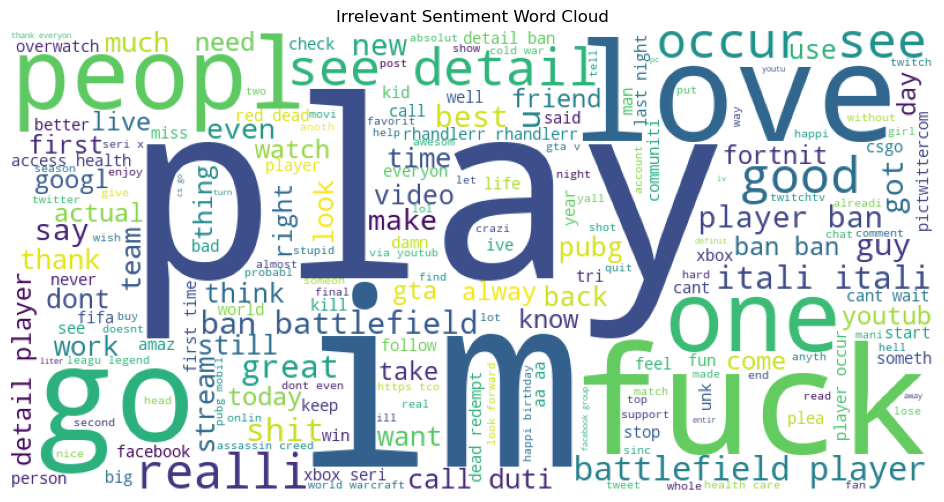

In [65]:
#Irrelevant Sentiment Word Cloud:

irrelevant_data = twitter[twitter['sentiment'] == 'Irrelevant']['comment'].str.cat(sep=" ")

irrelevant_data = irrelevant_data.replace("game", "")

if irrelevant_data.strip():
    wc = WordCloud(width=800, height=400, background_color='white').generate(irrelevant_data)
    plt.figure(figsize=(12, 6))
    plt.title('Irrelevant Sentiment Word Cloud')
    plt.imshow(wc)
    plt.axis("off")
    plt.show()
else:
    print("No data available for irrelevant sentiment.")

